In [1]:
import cv2
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt

In [2]:
im1 = cv2.imread('C:/Users/HP/Desktop/Jupyter_notebook_files/Computer_vision/Ex_02/additional-data/additional-data/harbor/IMG_1805.jpg')
im2 = cv2.imread('C:/Users/HP/Desktop/Jupyter_notebook_files/Computer_vision/Ex_02/additional-data/additional-data/harbor/IMG_1806.jpg')
im3 = cv2.imread('C:/Users/HP/Desktop/Jupyter_notebook_files/Computer_vision/Ex_02/additional-data/additional-data/harbor/IMG_1807.jpg')

In [3]:
image1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
image2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
image3 = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)

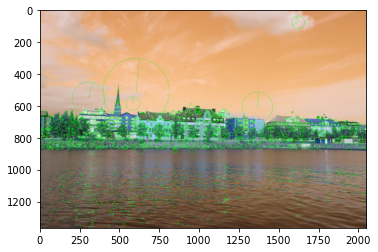

In [4]:
siftobject = cv2.xfeatures2d.SIFT_create()
keypoint1, descriptor1 = siftobject.detectAndCompute(image1, None)
keypoint2, descriptor2 = siftobject.detectAndCompute(image2, None)
keypoint3, descriptor3 = siftobject.detectAndCompute(image3, None)

keypointimage = cv2.drawKeypoints(im1, keypoint1, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# cv2.imshow('SIFT', keypointimage)
# cv2.waitKey()
plt.imshow(keypointimage)
plt.show()

In [5]:
## test
iteration = 10
for i in range (iteration):
    MIN_MATCH_COUNT = 100
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(descriptor1,descriptor2,k=2)
    # store all the good matches as per Lowe's ratio test.
    good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)
    print(len(good))
    if len(good)>MIN_MATCH_COUNT:
        src_pts = np.float32([ keypoint1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ keypoint2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        matchesMask = mask.ravel().tolist()
        h,w,d = im1.shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M)
        im2 = cv2.polylines(im2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
    else:
        print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
        matchesMask = None

    draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                       singlePointColor = None,
                       matchesMask = matchesMask, # draw only inliers
                       flags = 2)
    img3 = cv2.drawMatches(im1,keypoint1,im2,keypoint2,good,None,**draw_params)
    #plt.imshow(img3, 'gray'),plt.show()
    #plt.imshow(im2, 'gray'),plt.show()

2029
2030
2033
2040
2027
2033
2033
2030
2031
2030


In [108]:
## test
dst

array([[[1049.0609  ,   52.926624]],

       [[1121.5359  , 1213.3901  ]],

       [[4633.1895  , 1783.8586  ]],

       [[4625.2417  , -986.09784 ]]], dtype=float32)

In [6]:
## test
for m,n in matches:
    if m.distance < 0.7*n.distance:
        print(' m.distance:',  m.distance)
        print(' n.distance: ',  n.distance)
        good.append(m)

 m.distance: 182.8988800048828
 n.distance:  327.0137634277344
 m.distance: 160.90679931640625
 n.distance:  329.8727111816406
 m.distance: 118.27932739257812
 n.distance:  338.29278564453125
 m.distance: 116.78184509277344
 n.distance:  302.38055419921875
 m.distance: 209.49940490722656
 n.distance:  322.4779052734375
 m.distance: 173.18487548828125
 n.distance:  272.5307312011719
 m.distance: 45.14421463012695
 n.distance:  264.91131591796875
 m.distance: 81.5597915649414
 n.distance:  320.3529357910156
 m.distance: 119.05040740966797
 n.distance:  246.85015869140625
 m.distance: 177.01412963867188
 n.distance:  275.7045593261719
 m.distance: 157.1368865966797
 n.distance:  286.544921875
 m.distance: 108.8714828491211
 n.distance:  341.2740783691406
 m.distance: 81.51073455810547
 n.distance:  288.374755859375
 m.distance: 90.14987182617188
 n.distance:  334.4293518066406
 m.distance: 107.69865417480469
 n.distance:  323.6155090332031
 m.distance: 133.42788696289062
 n.distance:  308

 m.distance: 112.80071258544922
 n.distance:  296.26507568359375
 m.distance: 69.6634750366211
 n.distance:  163.8261260986328
 m.distance: 75.68354797363281
 n.distance:  242.6396484375
 m.distance: 61.64413833618164
 n.distance:  223.0986328125
 m.distance: 146.6594696044922
 n.distance:  307.7872619628906
 m.distance: 60.241180419921875
 n.distance:  306.3706970214844
 m.distance: 122.36012268066406
 n.distance:  275.7498779296875
 m.distance: 75.78258514404297
 n.distance:  329.39794921875
 m.distance: 102.36209869384766
 n.distance:  332.74615478515625
 m.distance: 108.72901916503906
 n.distance:  330.93353271484375
 m.distance: 88.75809478759766
 n.distance:  277.883056640625
 m.distance: 68.073486328125
 n.distance:  256.046875
 m.distance: 72.95204162597656
 n.distance:  262.3261413574219
 m.distance: 66.97760772705078
 n.distance:  256.2889099121094
 m.distance: 121.3342514038086
 n.distance:  347.4161682128906
 m.distance: 113.74533081054688
 n.distance:  294.9525451660156
 m

 m.distance: 57.375953674316406
 n.distance:  261.4479064941406
 m.distance: 58.77924728393555
 n.distance:  262.3509216308594
 m.distance: 86.6429443359375
 n.distance:  303.7433166503906
 m.distance: 63.30876541137695
 n.distance:  245.97764587402344
 m.distance: 38.09199523925781
 n.distance:  318.75067138671875
 m.distance: 70.0927963256836
 n.distance:  312.0608825683594
 m.distance: 99.15644073486328
 n.distance:  364.40087890625
 m.distance: 74.86654663085938
 n.distance:  379.8789367675781
 m.distance: 82.05486297607422
 n.distance:  322.3414306640625
 m.distance: 82.53484344482422
 n.distance:  309.5060729980469
 m.distance: 82.20097351074219
 n.distance:  256.1484069824219
 m.distance: 70.028564453125
 n.distance:  295.14404296875
 m.distance: 55.578773498535156
 n.distance:  295.9070739746094
 m.distance: 60.85227966308594
 n.distance:  295.694091796875
 m.distance: 68.67314147949219
 n.distance:  280.39971923828125
 m.distance: 85.9709243774414
 n.distance:  240.55352783203

 m.distance: 79.34103393554688
 n.distance:  361.8134765625
 m.distance: 69.41181182861328
 n.distance:  358.3015441894531
 m.distance: 79.1517562866211
 n.distance:  345.32159423828125
 m.distance: 63.411354064941406
 n.distance:  321.3938293457031
 m.distance: 73.76313781738281
 n.distance:  321.210205078125
 m.distance: 46.8294792175293
 n.distance:  263.6000671386719
 m.distance: 48.36320877075195
 n.distance:  268.38592529296875
 m.distance: 122.29472351074219
 n.distance:  243.02674865722656
 m.distance: 132.78176879882812
 n.distance:  297.2305603027344
 m.distance: 218.86753845214844
 n.distance:  322.25146484375
 m.distance: 94.03190612792969
 n.distance:  235.7371368408203
 m.distance: 75.76278686523438
 n.distance:  359.9527893066406
 m.distance: 60.67948532104492
 n.distance:  318.7130432128906
 m.distance: 71.7844009399414
 n.distance:  330.69622802734375
 m.distance: 63.04759979248047
 n.distance:  374.3688049316406
 m.distance: 67.43144989013672
 n.distance:  337.6166381

 m.distance: 171.0204620361328
 n.distance:  321.1214599609375
 m.distance: 115.77564239501953
 n.distance:  341.0967712402344
 m.distance: 128.31991577148438
 n.distance:  296.3578796386719
 m.distance: 115.58546447753906
 n.distance:  355.29144287109375
 m.distance: 89.3812026977539
 n.distance:  278.427734375
 m.distance: 113.50770568847656
 n.distance:  278.1007080078125
 m.distance: 161.7652587890625
 n.distance:  302.5260314941406
 m.distance: 182.40066528320312
 n.distance:  308.5238952636719
 m.distance: 164.1005859375
 n.distance:  321.468505859375
 m.distance: 116.01293182373047
 n.distance:  320.66961669921875
 m.distance: 98.60527038574219
 n.distance:  311.19287109375
 m.distance: 199.3313751220703
 n.distance:  313.1692810058594
 m.distance: 99.24212646484375
 n.distance:  265.0867919921875
 m.distance: 160.67047119140625
 n.distance:  291.4154968261719
 m.distance: 106.46595764160156
 n.distance:  351.6674499511719
 m.distance: 151.14892578125
 n.distance:  339.092895507

In [7]:
pts1 = cv2.KeyPoint_convert(keypoint1)
pts2 = cv2.KeyPoint_convert(keypoint2)
pts3 = cv2.KeyPoint_convert(keypoint3)


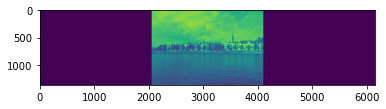

In [8]:
height = image1.shape[0]
width = image1.shape[1]
src = np.float32([[0,0], [(width-1),0], [0, (height-1)], [(width-1), (height-1)]])
dst = np.float32([[width,0], [2*width-1,0], [width, height-1], [2*width-1, height-1]])
resmatrix = cv2.getPerspectiveTransform(src, dst)
resultimage = cv2.warpPerspective(image2, resmatrix, (3*width, height))
# cv2.imshow('resultimage', resultimage)
# cv2.waitKey()
plt.imshow(resultimage)
plt.show()


In [9]:
resmatrix

array([[ 1.000e+00,  0.000e+00,  2.048e+03],
       [ 0.000e+00,  1.000e+00,  0.000e+00],
       [-0.000e+00, -0.000e+00,  1.000e+00]])

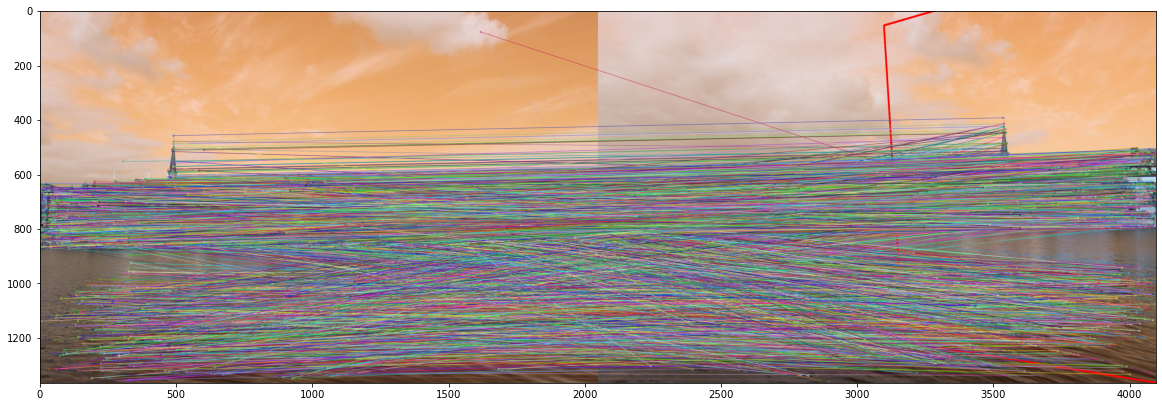

In [10]:
bf = cv2.BFMatcher()
mat1 = bf.match(descriptor1, descriptor2)
matches1 = sorted(mat1, key = lambda x:x.distance)
mat2 = bf.match(descriptor2, descriptor3)
matches2 = sorted(mat2, key = lambda x:x.distance)

matched_image = cv2.drawMatches(im1, keypoint1, im2, keypoint2, matches1, None, flags=2)
# cv2.imshow('matched_image', matched_image)
# cv2.waitKey()
plt.figure(figsize = (20,20))
plt.imshow(matched_image)
plt.show()

In [11]:
## match for 1st and 2nd img
list_kp1 = []
list_kp2 = []
for mat in matches1:
    img1_idx = mat.queryIdx
    img2_idx = mat.trainIdx

    # x - columns
    # y - rows
    # Get the coordinates
    (x1, y1) = keypoint1[img1_idx].pt
    (x2, y2) = keypoint2[img2_idx].pt
    # Append to each list
    list_kp1.append((x1, y1))
    list_kp2.append((x2, y2))

In [12]:
all_points = np.arange(len(list_kp1))
random_points = np.random.choice(all_points, 4)
p1 = []
p2 = []
for p in random_points:
    p1.append(list(list_kp1[p]))
    p2.append(list(list_kp2[p]))
# src = np.array(p1).reshape(4,2).squeeze()
# dst = np.array(p2).reshape(4,2).squeeze()
src = np.float32(p1)
dst = np.float32(p2)

M, mask = cv2.findHomography(src, dst, cv2.RANSAC,5)
matchesMask = mask.ravel().tolist()
#print(mask)
# resmatrix = cv2.getPerspectiveTransform(src, dst)
# resultimage = cv2.warpPerspective(image2, resmatrix, (3*width, height))
# plt.imshow(resultimage)
# plt.show()

h,w,d = im1.shape
#pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
pts = np.float32(pts1).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)
#print(len(dst))

# im2 = cv2.polylines(im2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

# draw_params = dict(matchColor = (0,255,0), # draw matches in green color
#                    singlePointColor = None,
#                    matchesMask = matchesMask, # draw only inliers
#                    flags = 2)
# img3 = cv2.drawMatches(im1,keypoint1,im2,keypoint2,None,**draw_params)
# plt.imshow(img3, 'gray'),plt.show()

In [13]:
## test
src_pts = np.array(list_kp1[0:100])
dst_pts = np.array(list_kp2[0:100])
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,0.1)
matchesMask = mask.ravel().tolist()
# pts = np.float32([[0,0],[0,height-1],[width-1,height-1],[width-1,0]])
# dst = cv2.perspectiveTransform(pts,M)
t = 0
for i in range(len(matchesMask)):
    t = t+1 if matchesMask[i] == 1 else t

t

25